## Lab 1
### UGBA 96: Data and Decisions

<br>

## Economic Mobility at Calfornia Public Institutions

In this lab we will analyze the data on college Mobility Report Cards from lecture to answer more questions about economic mobility, specifically at public universities and community colleges in California. One important justification for public spending on higher education is that colleges and universities are engines of social mobility. We will investigate how access, success, and upward mobility rates vary across institutions. We will write a function that generates a Report Card for a provided institution. We will also explore how access has changed over time, as California’s spending on public higher education has declined or stagnated. 

The lab is intended to illustrate how descriptive statistics alone can provide valuable insight.

Dependencies

- Numpy
- Matplotlib

In [67]:
from datascience import *
import numpy as np

#These lines set up graphing capabilities.
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Comparing Access, Success, and Mobility Across Institutions
First, we’ll open the cross-sectional data from the paper. In this dataset there is one row of data for each college and university in the US.

(Though we discuss the columns we'll use in this lab, look [here](http://www.equality-of-opportunity.org/data/college/Codebook%20MRC%20Table%202.pdf) for documentation on the remaining contents of these data.)


** 1.1 ** First, let's load the data and the specific columns we'll use in this lab.

In [68]:
mobility = Table.read_table("mrc_table2.csv").select(['super_opeid', 'name', 'type', 'tier', 'iclevel', 'state', 'count', 'mr_kq5_pq1', 'par_mean', 'par_median',
         'par_rank', 'par_q1', 'par_q2', 'par_q3', 'par_q4', 'par_q5', 'kq5_cond_parq1', 'kq5_cond_parq2', 'kq5_cond_parq3', 'kq5_cond_parq4', 'kq5_cond_parq5'])

print("Table Dimensions:", mobility.num_columns , "X" , mobility.num_rows)
mobility

Table Dimensions: 21 X 2202


super_opeid,name,type,tier,iclevel,state,count,mr_kq5_pq1,par_mean,par_median,par_rank,par_q1,par_q2,par_q3,par_q4,par_q5,kq5_cond_parq1,kq5_cond_parq2,kq5_cond_parq3,kq5_cond_parq4,kq5_cond_parq5
30955,ASA Institute Of Business & Computer Technology,Private For-profit,Two-year for-profit,Two-year,NY,275,0.0200339,35390.4,29000,0.274209,0.443575,0.32679,0.143711,0.0597068,0.0262172,0.0451647,0.0846899,0.0700376,0.115644,0.197233
3537,Abilene Christian University,Private Non-profit,Selective private,Four-year,TX,838.667,0.0143638,138761,101000,0.683686,0.0524414,0.101032,0.163936,0.25824,0.424351,0.273903,0.247651,0.201662,0.314671,0.361872
1541,Abraham Baldwin Agricultural College,Public,Nonselective four-year public,Four-year,GA,679.333,0.0148573,80366.7,66000,0.525406,0.154555,0.187159,0.225497,0.236763,0.196027,0.0961297,0.142476,0.16164,0.201234,0.225072
7531,Academy Of Art University,Private For-profit,Four-year for-profit,Four-year,CA,495.667,0.0163574,166595,92300,0.64921,0.0935242,0.122917,0.175349,0.211525,0.396684,0.1749,0.244055,0.251138,0.251914,0.296605
1345,Adams State University,Public,Selective public,Four-year,CO,393.333,0.0188447,76121.8,67200,0.540471,0.129224,0.185504,0.248429,0.260876,0.175967,0.145829,0.162433,0.202049,0.203434,0.291564
2666,Adelphi University,Private Non-profit,Selective private,Four-year,NY,509,0.0325851,130724,96300,0.648892,0.087048,0.128539,0.156434,0.229865,0.398115,0.374334,0.412744,0.435048,0.428085,0.486246
2860,Adirondack Community College - SUNY Office Of Community ...,Public,Two-year (public and private not-for-profit),Two-year,NY,663,0.00994093,75699.3,69900,0.534997,0.114288,0.177607,0.255219,0.294449,0.158437,0.0869813,0.152086,0.161077,0.193027,0.216319
2234,Adrian College,Private Non-profit,Selective private,Four-year,MI,240.333,0.00956463,113708,88500,0.643139,0.0607603,0.115356,0.200813,0.281327,0.341744,0.157416,0.224237,0.216115,0.275071,0.338695
11484,Advanced Institute Of Hair Design,Private For-profit,Two-year for-profit,Two-year,WI,58,0.0201729,90962.8,78100,0.621007,0.0259021,0.111165,0.254503,0.408,0.20043,0.778813,0.0377138,0.0397531,0.0395086,0.0870772
31275,Advanced Technology Institute,Private For-profit,Two-year for-profit,Two-year,VA,127.667,0.0314387,69400.1,57200,0.481593,0.159531,0.218921,0.262734,0.223529,0.135285,0.197069,0.136637,0.112319,0.26891,0.248177


**1.2** In this lab we will focus on Calfornia public institutions. Let’s filter the data to reflect this.

In [69]:
ca_pub_mobility = mobility.where('type', are.equal_to('Public')).where('state', are.equal_to('CA'))

print("Table Dimensions:", ca_pub_mobility.num_columns , "X" , ca_pub_mobility.num_rows)
ca_pub_mobility

Table Dimensions: 21 X 100


super_opeid,name,type,tier,iclevel,state,count,mr_kq5_pq1,par_mean,par_median,par_rank,par_q1,par_q2,par_q3,par_q4,par_q5,kq5_cond_parq1,kq5_cond_parq2,kq5_cond_parq3,kq5_cond_parq4,kq5_cond_parq5
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,1220,0.0194642,76983.8,65700,0.529356,0.140892,0.18906,0.234964,0.256879,0.178205,0.13815,0.177481,0.142748,0.22633,0.237283
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,1904.67,0.0192804,71043.7,66600,0.520847,0.164019,0.174746,0.219868,0.262804,0.178563,0.11755,0.160699,0.186232,0.239308,0.241404
1119,Barstow Community College,Public,Two-year (public and private not-for-profit),Two-year,CA,478,0.034889,62711.7,58000,0.470689,0.189246,0.212735,0.258158,0.233625,0.106236,0.184357,0.159173,0.192538,0.219748,0.215737
8073,Butte College,Public,Two-year (public and private not-for-profit),Two-year,CA,1751,0.0195759,81294.3,64100,0.523958,0.160595,0.191634,0.219265,0.232414,0.196092,0.121896,0.154983,0.188043,0.22489,0.289993
1124,Cabrillo College,Public,Two-year (public and private not-for-profit),Two-year,CA,1641,0.01749,103352,70200,0.560304,0.14195,0.186602,0.194204,0.202574,0.27467,0.123212,0.168418,0.183345,0.226415,0.241433
1134,California Maritime Academy,Public,Selective public,Four-year,CA,92,0.0503638,132454,113100,0.712131,0.0592691,0.0725417,0.163071,0.199129,0.505989,0.849747,0.648926,0.576723,0.702518,0.767326
1143,California Polytechnic State University,Public,Selective public,Four-year,CA,2887.67,0.0224849,169836,124800,0.753249,0.0419739,0.0677819,0.111822,0.202395,0.576028,0.535687,0.549185,0.587494,0.557811,0.607777
1144,"California State Polytechnic University, Pomona",Public,Selective public,Four-year,CA,2195.33,0.068334,98379,80200,0.583456,0.149297,0.154089,0.158693,0.209419,0.328502,0.457705,0.465166,0.477746,0.505289,0.526753
1150,California State University - Sacramento,Public,Selective public,Four-year,CA,2041.33,0.0333323,107519,88700,0.623631,0.104529,0.133005,0.16694,0.236661,0.358864,0.318882,0.339189,0.386855,0.40559,0.440235
39803,California State University Channel Islands,Public,Nonselective four-year public,Four-year,CA,50,0.0159773,141961,96300,0.664562,0.0506875,0.100416,0.180595,0.220046,0.448255,0.315212,0.0789054,0.331507,0.470838,0.307285


*Note: See how we can "chained" __.where__ statements? *

This is because calling .where() on a table object, returns another table object, so you can theoretically use infinite .where() statements that each filter out rows of the table.

We are left with a total of 100 institutions.

## Exploring the Data 

We will first describe the distributions of _access, success rates, and mobility rates_ across institutions. We use the same definitions of these terms used in the paper and described in lecture:

- **`access` (`par_q1`):** the share of students enrolled that are ‘low income’–those whose parent's income is in the bottom quintile (bottom 20%) of the parental income distribution. Note: share values range from 0 to 1.

    - Note: though we won't use these columns in the exercises in the columns below, we also have columns `par_q2`, `par_q3`, `par_q4`, and `par_q5`. These contain the share of students with parents in the rest of the income distribution. Feel free to explore these data after you've completed the exercises.


- **`success` (`kq5_cond_parq1`):** the share of low income students with incomes in the top quintile (top 20%) of the student income distribution, measured at age 32-34.

    - Note: though we won't use these columns in the exercises in the columns below, we also have columns `kq5_cond_parq2`, `kq5_cond_parq3`, `kq5_cond_parq4`, and `kq5_cond_parq5`. These contain the share of students with incomes in the top quintile of the student income distribution for students with parents in the rest of the income distribution. Feel free to explore these data after you've completed the exercises.


- **`mobility` (`mr_kq5_pq1`):** the share of students enrolled that are both ‘low income’ and later have earnings in the top quintile (top 20%) of the student income distribution.

Note that `mobility` $=$ `access` $\times$ `success`. Hence, institutions with high mobility will tend to have more low income students and high 'success' rates with those students.

** 1.3 ** To make the data easier to interpret, let's rescale these columns to express them as *percentages* rather than *shares.* To do this, we'll just multiply `par_q1`, `kq5_cond_parq1`, and `mr_kq5_pq1` by 100.


In [70]:
#rescale access, success, and mobility rates
#only run this once!
ca_pub_mobility = ca_pub_mobility.with_columns(
    'par_q1', ca_pub_mobility.column('par_q1')*100,
    'par_q2', ca_pub_mobility.column('par_q2')*100,
    'par_q3', ca_pub_mobility.column('par_q3')*100,
    'par_q4', ca_pub_mobility.column('par_q4')*100,
    'par_q5', ca_pub_mobility.column('par_q5')*100,
    'kq5_cond_parq1', ca_pub_mobility.column('kq5_cond_parq1')*100,
    'kq5_cond_parq2', ca_pub_mobility.column('kq5_cond_parq2')*100,
    'kq5_cond_parq3', ca_pub_mobility.column('kq5_cond_parq3')*100,
    'kq5_cond_parq4', ca_pub_mobility.column('kq5_cond_parq4')*100,
    'kq5_cond_parq5', ca_pub_mobility.column('kq5_cond_parq5')*100,
    'mr_kq5_pq1', ca_pub_mobility.column('mr_kq5_pq1')*100,
)

ca_pub_mobility

super_opeid,name,type,tier,iclevel,state,count,mr_kq5_pq1,par_mean,par_median,par_rank,par_q1,par_q2,par_q3,par_q4,par_q5,kq5_cond_parq1,kq5_cond_parq2,kq5_cond_parq3,kq5_cond_parq4,kq5_cond_parq5
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,1220,1.94642,76983.8,65700,0.529356,14.0892,18.906,23.4964,25.6879,17.8205,13.815,17.7481,14.2748,22.633,23.7283
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,1904.67,1.92804,71043.7,66600,0.520847,16.4019,17.4746,21.9868,26.2804,17.8563,11.755,16.0699,18.6232,23.9308,24.1404
1119,Barstow Community College,Public,Two-year (public and private not-for-profit),Two-year,CA,478,3.4889,62711.7,58000,0.470689,18.9246,21.2735,25.8158,23.3625,10.6236,18.4357,15.9173,19.2538,21.9748,21.5737
8073,Butte College,Public,Two-year (public and private not-for-profit),Two-year,CA,1751,1.95759,81294.3,64100,0.523958,16.0595,19.1634,21.9265,23.2414,19.6092,12.1896,15.4983,18.8043,22.489,28.9993
1124,Cabrillo College,Public,Two-year (public and private not-for-profit),Two-year,CA,1641,1.749,103352,70200,0.560304,14.195,18.6602,19.4204,20.2574,27.467,12.3212,16.8418,18.3345,22.6415,24.1433
1134,California Maritime Academy,Public,Selective public,Four-year,CA,92,5.03638,132454,113100,0.712131,5.92691,7.25417,16.3071,19.9129,50.5989,84.9747,64.8926,57.6723,70.2518,76.7326
1143,California Polytechnic State University,Public,Selective public,Four-year,CA,2887.67,2.24849,169836,124800,0.753249,4.19739,6.77819,11.1822,20.2395,57.6028,53.5687,54.9185,58.7494,55.7811,60.7777
1144,"California State Polytechnic University, Pomona",Public,Selective public,Four-year,CA,2195.33,6.8334,98379,80200,0.583456,14.9297,15.4089,15.8693,20.9419,32.8502,45.7705,46.5166,47.7746,50.5289,52.6753
1150,California State University - Sacramento,Public,Selective public,Four-year,CA,2041.33,3.33323,107519,88700,0.623631,10.4529,13.3005,16.694,23.6661,35.8864,31.8882,33.9189,38.6855,40.559,44.0235
39803,California State University Channel Islands,Public,Nonselective four-year public,Four-year,CA,50,1.59773,141961,96300,0.664562,5.06875,10.0416,18.0595,22.0046,44.8255,31.5212,7.89054,33.1507,47.0838,30.7285


### Access

** 1.4 ** First let’s look at the distribution of `access` across institutions. We'll do this by creating a histogram of this column.

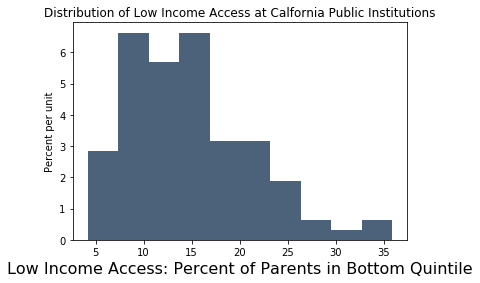

In [71]:
#create histogram of access column (named par_q1)
ca_pub_mobility.hist("par_q1")

#the code below will label the axes and title of your histogram
plt.title('Distribution of Low Income Access at Calfornia Public Institutions')
plt.xlabel('Low Income Access: Percent of Parents in Bottom Quintile')

Across institutions, `access` varies from about 0.05 to 0.35, with a relatively long right tail in the distribution.

**1.5** Now, we'll look at some summary statistics of the data.

Summary statistics are numbers we use to describe various aspects of our data, such as the *mean*, *standard deviation*, and various *percentiles*.

Here, we compute the mean, standard deviation, 25th, 50th (median) and 75th percentiles of the column `access`.

In [72]:
#note: the function np.percentile(x, A) takes an array x and calculates percentiles of x corresponding to the values of an array A, ranging from 0-100.
print("The mean of access is "+str(np.mean(ca_pub_mobility.column("par_q1")))+".")
print("The standard deviation of access is "+str(np.std(ca_pub_mobility.column("par_q1")))+".")
print("The 25th percentile of access is "+str(np.percentile(ca_pub_mobility.column("par_q1"),25))+".")
print("The 50th percentile/median of access is "+str(np.percentile(ca_pub_mobility.column("par_q1"),50))+".")
print("The 75th percentile of access is "+str(np.percentile(ca_pub_mobility.column("par_q1"),75))+".")

The mean of access is 14.896758593.
The standard deviation of access is 6.5183898308.
The 25th percentile of access is 9.9284111.
The 50th percentile/median of access is 14.0630135.
The 75th percentile of access is 18.806775.


Recall that, by definition, 20% of California college-aged adults have parents with income in the bottom quintile of the income distribution. Hence, if a school reflected the income mix of the population, it would have about 20% of its students coming from the bottom quintile of the income distribution. That would imply an `access` value of 0.20. Most institutions have fewer low income students than a 'representative' school would have, though some have more.

### Success Rates

**1.6** Now let's look at the distribution of `success` across these institutions.

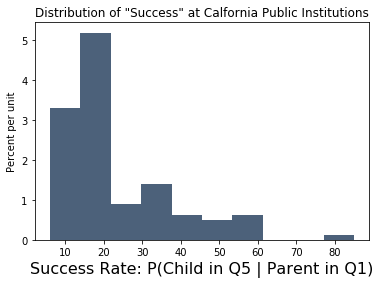

In [73]:
#create histogram of access column (named kq5_cond_parq1)
ca_pub_mobility.hist("kq5_cond_parq1")
#the code below will label the axes and title of your histogram
plt.title('Distribution of "Success" at Calfornia Public Institutions')
plt.xlabel('Success Rate: P(Child in Q5 | Parent in Q1)')

Notice that one institution has a substantially larger `success` rate than the rest. This type of data point, one that does not fit the overall pattern of the data, is often referred to as an **outlier**.

**1.7 ** What institution is that outlier?

To find this, we can filter the table to look at rows where `success` is sufficiently large. Alternatively you can order the table by success and select the top row.

In [74]:
print("The outlier institution is " +ca_pub_mobility.sort("kq5_cond_parq1", descending = True).column("name").item(0)+".")

The outlier institution is California Maritime Academy.


** 1.8 ** Let's compute the same summary statistics for `success`: the mean, standard deviation, and the same percentile values.

In [75]:
print("The mean of success is "+str(np.mean(ca_pub_mobility.column("kq5_cond_parq1")))+".")
print("The standard deviation of success is "+str(np.std(ca_pub_mobility.column("kq5_cond_parq1")))+".")
print("The 25th percentile of success is "+str(np.percentile(ca_pub_mobility.column("kq5_cond_parq1"),25))+".")
print("The 50th percentile/median of success is "+str(np.percentile(ca_pub_mobility.column("kq5_cond_parq1"),50))+".")
print("The 75th percentile of success is "+str(np.percentile(ca_pub_mobility.column("kq5_cond_parq1"),75))+".")

The mean of success is 22.891854498.
The standard deviation of success is 13.9731712265.
The 25th percentile of success is 13.78117925.
The 50th percentile/median of success is 17.100701.
The 75th percentile of success is 30.26187775.


**1.9** Which factor is more important for ranking institutions by mobility: `access` or `success`? One way to answer this is to see which factor *varies* more acorss institutions. If all institutions have similar `success` rates, but dramatically different levels of `access`, than `access` would be a more important factor for ranking institutions.

**Problem:** They are on different scales. 

**Solution:** There are *relative* measures of variability that account for the fact that the two variables have different means, such as the **coefficient of variation**.

This is defined as the ratio of the standard deviation to the mean: 

$$ C_v = \frac{\sigma}{\mu} $$

or the sample equivalent: 

$$ C_v = \frac{s_v}{\bar x} $$

Let’s create a *function* called `coef_var` that computes the coefficient of variation for a sample of data.

It should take in an array of values. You can get this by using Table.column('name').

In [76]:
# write your function below
def coef_var(arr):
    return np.std(arr)/np.mean(arr)

** 1.10 ** Compare the coefficient of variation for `access` and `success`. What do you conclude?

In [77]:
coef_var_access = coef_var(ca_pub_mobility.column("par_q1"))
coef_var_success = coef_var(ca_pub_mobility.column("kq5_cond_parq1"))

print("The coefficient of variability for access is "+str(coef_var_access)+".")
print("The coefficient of variability for success is "+str(coef_var_success)+".")

The coefficient of variability for access is 0.437571018561.
The coefficient of variability for success is 0.610399267903.


** 1.11** Let's examine the relationship between `access` and `success`. Create a scatterplot with `access` on the horizontal axis and `success` on the vertical access.

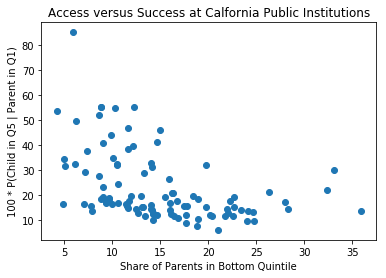

In [78]:
#create scatter plot

plt.scatter(ca_pub_mobility.column("par_q1"),ca_pub_mobility.column("kq5_cond_parq1"))

#the code below will label the axes and title of your scatter plot
plt.title('Access versus Success at Calfornia Public Institutions')
plt.xlabel('Share of Parents in Bottom Quintile')
plt.ylabel('100 * P(Child in Q5 | Parent in Q1)')

**1.12** Describe the relationship between `access` and `success`.

Interestingly, despite the clear relationship between `access` and `success` you've noted above, there is still a lot of variation in `access` among institutions with similar `success` rates. You can see that from this figure from the paper (which includes all US colleges and universities, not just public Calfornia schools):

<img src="success_cond_var.png" alt="Drawing" style="width: 600px;"/>

This suggests an interesting policy question: how are institutions producing students of similar 'quality' (as measured by earnings) yet providing very different levels of access? What can be learned from the more accessible colleges and universities?

### Mobility Rates

Finally, let's investigate `mobility` across institutions.

** 1.13** Recall that for each school, upward mobility is the product of access and  success rates. Let's confirm this in the data by creating our own mobility measure and comparing it to the `mobility` column in the data.

In [79]:
ca_pub_mobility = ca_pub_mobility.with_columns("mobility",np.multiply(ca_pub_mobility.column("par_q1"),ca_pub_mobility.column("kq5_cond_parq1")))

** 1.14** Now let's look at the distribution of upward mobility across institutions. 

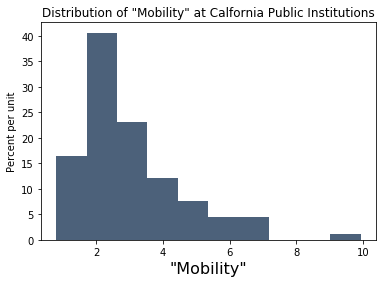

In [80]:
#create histogram of access column (named mr_kq5_pq1)
ca_pub_mobility.hist("mr_kq5_pq1")
#the code below will label the axes and title of your histogram
plt.title('Distribution of "Mobility" at Calfornia Public Institutions')
plt.xlabel('"Mobility"')

**1.15 ** You should see another outlier. What institution is that?

In [81]:
print("The outlier institution is " +ca_pub_mobility.sort("mr_kq5_pq1", descending = True).column("name").item(0)+".")

The outlier institution is California State University, Los Angeles.


This institution has a relatively high `success` rate, and one of the largest levels of `access`.

** 1.16 ** Let's compute the same summary statistics for `mobility`: the mean, standard deviation, and the same percentile values.

In [82]:
print("The mean of mobility is "+str(np.mean(ca_pub_mobility.column("mr_kq5_pq1")))+".")
print("The standard deviation of mobility is "+str(np.std(ca_pub_mobility.column("mr_kq5_pq1")))+".")
print("The 25th percentile of mobility is "+str(np.percentile(ca_pub_mobility.column("mr_kq5_pq1"),25))+".")
print("The 50th percentile/median of mobility is "+str(np.percentile(ca_pub_mobility.column("mr_kq5_pq1"),50))+".")
print("The 75th percentile of mobility is "+str(np.percentile(ca_pub_mobility.column("mr_kq5_pq1"),75))+".")

The mean of mobility is 3.0058129031.
The standard deviation of mobility is 1.57570076096.
The 25th percentile of mobility is 1.814370075.
The 50th percentile/median of mobility is 2.54024975.
The 75th percentile of mobility is 3.71012755.


**1.17** Let's examine the values of `access`, `success`, and `mobility` for Berkeley. How would you say they compare to other California public institutions? For example, between what quantiles does Berkeley rank on each measure?

In [83]:
ca_pub_mobility.where('name', are.equal_to('University Of California, Berkeley'))

super_opeid,name,type,tier,iclevel,state,count,mr_kq5_pq1,par_mean,par_median,par_rank,par_q1,par_q2,par_q3,par_q4,par_q5,kq5_cond_parq1,kq5_cond_parq2,kq5_cond_parq3,kq5_cond_parq4,kq5_cond_parq5,mobility
1312,"University Of California, Berkeley",Public,Highly selective public,Four-year,CA,4624.33,4.8851,194452,114700,0.698319,8.84234,10.614,12.8856,16.3082,51.3498,55.2467,56.9978,58.3739,58.4709,62.0903,488.51


## 2. Creating a College Report Card

<img src="berkeley_mrc.png">

The main output of the Chetty et al. (2017) project is a Mobility Report Card for each school included in their data. The Report Card shows the composition of an institution's students by parental income quintile, and success rates by parental income quintile. Report Cards for each institution can be found [here](https://sites.google.com/site/dannyyagan/college).

Above, you can see the Report Card for UC Berkeley. The figure includes a bar chart for the distribution of students by parental income quintile, and a line plot the show success rates by parental income quintile. The figure is effective--it presents a lot of information without too much clutter.

In this section we will create a function that generates a Report Card comparing two institutions.

**2.1** For this exercise, it will be easier to work with the data in a different format. Again, we will restrict to public California colleges and universities.

In [84]:
#read in data
mobility_long = Table.read_table("mrc_table2_long.csv")

#restrict to CA public institutions again
ca_pub_mobility_long = mobility_long.where('type', are.equal_to('Public')).where('state', are.equal_to('CA'))

ca_pub_mobility_long


super_opeid,name,type,tier,iclevel,state,parq,share,kq5_cond_parq
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,1,0.140892,0.13815
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,2,0.18906,0.177481
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,3,0.234964,0.142748
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,4,0.256879,0.22633
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,5,0.178205,0.237283
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,1,0.164019,0.11755
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,2,0.174746,0.160699
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,3,0.219868,0.186232
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,4,0.262804,0.239308
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,5,0.178563,0.241404


Notice that now there are *5* observations per institution. While each row represented an institution in the first table, in this table each row represents an institution by parental income quintile *pair*. The latter is denoted by the column `parq`. 

(What we have done is transformed the data from *wide* to *long* format. The details of this are beyond the scope of this lab, but you can think of it as the opposite of the `pivot` function introduced in Data 8.)

There are two other columns that require explanation:

- **`share`**: this is the share of students at the institution with parental income in the quintile indicated by `parq`. Across the 5 rows for each institution, these values will sum to 1.

- **`kq5_cond_parq`**: this is the 'success rate' for students from a particular institution and parental income quintile. In other words, it is the share of students that reach the top quintile of the children's income distribution.

As above, let's rescale `share` and `kq5_cond_parq` to express them as percentages rather than shares.


In [85]:
#rescale share and kq5_cond_parq

#only run this once!
ca_pub_mobility_long = ca_pub_mobility_long.with_columns(
    'percent', ca_pub_mobility_long.column('share')*100,
    'kq5_cond_parq', ca_pub_mobility_long.column('kq5_cond_parq')*100
)

ca_pub_mobility_long


super_opeid,name,type,tier,iclevel,state,parq,share,kq5_cond_parq,percent
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,1,0.140892,13.815,14.0892
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,2,0.18906,17.7481,18.906
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,3,0.234964,14.2748,23.4964
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,4,0.256879,22.633,25.6879
1111,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,5,0.178205,23.7283,17.8205
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,1,0.164019,11.755,16.4019
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,2,0.174746,16.0699,17.4746
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,3,0.219868,18.6232,21.9868
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,4,0.262804,23.9308,26.2804
1113,Antelope Valley College,Public,Two-year (public and private not-for-profit),Two-year,CA,5,0.178563,24.1404,17.8563


**2.2** First, create the bar chart portion of the Report Card for UC Berkeley.


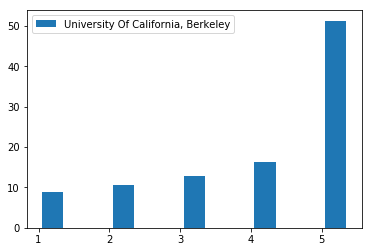

In [86]:
#create table with just Berkeley data
berkeley_mobility_long = ca_pub_mobility_long.where('name', are.equal_to('University Of California, Berkeley'))

#create bar chart
bar_width = 0.3 
plt.bar(berkeley_mobility_long.column('parq') + bar_width/2 + .05, berkeley_mobility_long.column('percent'), bar_width, label = 'University Of California, Berkeley')
plt.legend()

plt.show()

**2.3** Next, create the line plot portion.

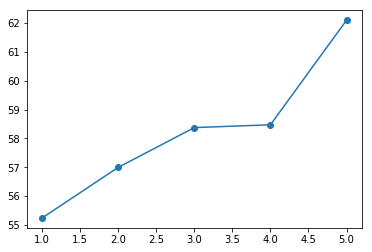

In [87]:
#create line plot
plt.plot(berkeley_mobility_long.column('parq'), berkeley_mobility_long.column('kq5_cond_parq'), marker='o')


Notice the difference in vertical scales for the two figures.

**2.4** Let's put the last two pieces together in one figure as in the offical Report Cards.

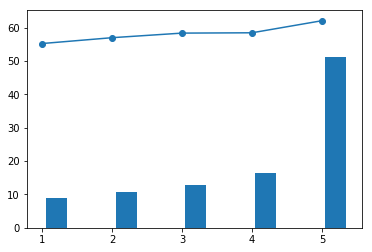

In [88]:
#copy and paste your code from previous two cells
plt.bar(berkeley_mobility_long.column('parq') + bar_width/2 + .05, berkeley_mobility_long.column('percent'), bar_width, label = 'University Of California, Berkeley')
plt.plot(berkeley_mobility_long.column('parq'), berkeley_mobility_long.column('kq5_cond_parq'), marker='o')
#include this last line
plt.show()

We're almost there! We just need to combine the data from two institutions in one plot. The code below generates a Report Card that compares UC Berkeley and UC Davis. 

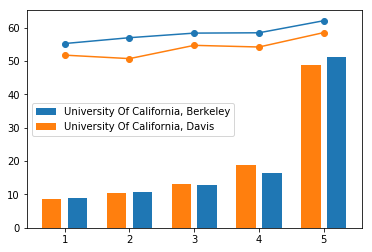

In [89]:
#create report card that compares two institutions
bar_width = 0.3  # default: 0.8

school1 = ca_pub_mobility_long.where('name', are.equal_to('University Of California, Berkeley'))
school2 = ca_pub_mobility_long.where('name', are.equal_to('University Of California, Davis'))

#create the bar charts
plt.bar(school1.column('parq') + bar_width/2 + .05, school1.column('percent'), bar_width, label = 'University Of California, Berkeley')
plt.bar(school2.column('parq') - bar_width/2 - .05, school2.column('percent'), bar_width, label = 'University Of California, Davis')

#create the line plots
plt.plot(school1.column('parq'), school1.column('kq5_cond_parq'), marker='o')
plt.plot(school2.column('parq'), school2.column('kq5_cond_parq'), marker='o')

plt.legend()

plt.show()

**2.5** Create a function that takes two institution names as arguments and returns a Report Card that compares the two.

In [90]:
#turn into function
#hint: you should first copy the code from the cell above and then make some minor changes so that 'UC Berkeley' and 'UC Davis' are replaced by the names for the function arguments.

def report_card(a, b):
    bar_width = 0.3  # default: 0.8

    school1 = ca_pub_mobility_long.where('name', are.equal_to(a))
    school2 = ca_pub_mobility_long.where('name', are.equal_to(b))

    #create the bar charts
    plt.bar(school1.column('parq') + bar_width/2 + .05, school1.column('percent'), bar_width, label = a)
    plt.bar(school2.column('parq') - bar_width/2 - .05, school2.column('percent'), bar_width, label = b)
    #create the line plots
    plt.plot(school1.column('parq'), school1.column('kq5_cond_parq'), marker='o')
    plt.plot(school2.column('parq'), school2.column('kq5_cond_parq'), marker='o')

    plt.legend()
    return plt.show()

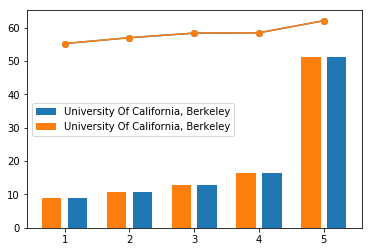

In [91]:
report_card('University Of California, Berkeley', 'University Of California, Berkeley')

**2.6** Generate a report card using two institutions of your choosing. Describe the comparison.

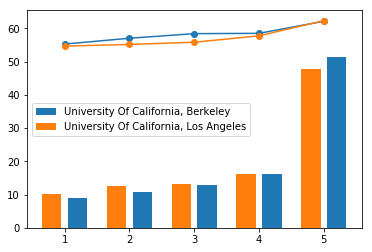

In [92]:
report_card('University Of California, Berkeley', 'University Of California, Los Angeles')

## 3. How Does Access Vary Over Time?
Next, we’ll look at how low income access to California public institutions has changed over time. Over the last 40 years, public spending on higher education in Calfornia has changed dramatically, as demonstrated by the figure below.

<img src = http://www.ppic.org/content/images/InstCosts_Fig1.png, title = 'higher education funding in California'>

**UC :** University of California, 
<br>
**CSU :** California State University

Here's a relevant DailyCal article that outlines how funding has changed over the years
http://www.dailycal.org/2014/12/22/history-uc-tuition-since-1868/
<br>

** 3.1 ** Let's load and examine the longitudinal data and the specific columns we'll use in this section.

In [93]:
mobility_panel = Table.read_table('mrc_table3.csv').select(make_array('super_opeid', 'cohort', 'name', 'type', 'tier', 
                                                          'iclevel', 'state', 'count', 'mr_kq5_pq1', 'par_mean', 'par_median',
                                                          'par_rank', 'par_q1', 'par_q2', 'par_q3', 'par_q4', 'par_q5', 'kq5_cond_parq1', 
                                                          'kq5_cond_parq2', 'kq5_cond_parq3', 'kq5_cond_parq4', 'kq5_cond_parq5'))

#restrict to California public and private (non-profit) institutions
ca_mobility_panel = mobility_panel.where('state', are.equal_to('CA')).where('type', are.contained_in(make_array('Public', 'Private Non-profit')))

#rescale access, success, and mobility rates
ca_mobility_panel = ca_mobility_panel.with_columns(
    'par_q1', ca_mobility_panel.column('par_q1')*100,
    'par_q2', ca_mobility_panel.column('par_q2')*100,
    'par_q3', ca_mobility_panel.column('par_q3')*100,
    'par_q4', ca_mobility_panel.column('par_q4')*100,
    'par_q5', ca_mobility_panel.column('par_q5')*100,
    'kq5_cond_parq1', ca_mobility_panel.column('kq5_cond_parq1')*100,
    'kq5_cond_parq2', ca_mobility_panel.column('kq5_cond_parq2')*100,
    'kq5_cond_parq3', ca_mobility_panel.column('kq5_cond_parq3')*100,
    'kq5_cond_parq4', ca_mobility_panel.column('kq5_cond_parq4')*100,
    'kq5_cond_parq5', ca_mobility_panel.column('kq5_cond_parq5')*100,
    'mr_kq5_pq1', ca_mobility_panel.column('mr_kq5_pq1')*100
)

ca_mobility_panel

super_opeid,cohort,name,type,tier,iclevel,state,count,mr_kq5_pq1,par_mean,par_median,par_rank,par_q1,par_q2,par_q3,par_q4,par_q5,kq5_cond_parq1,kq5_cond_parq2,kq5_cond_parq3,kq5_cond_parq4,kq5_cond_parq5
1111,1980,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1111,1981,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1111,1982,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1111,1983,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,966,1.78234,77804.8,67800,0.527373,13.7447,17.8704,24.799,27.4024,16.1835,12.9675,18.1321,14.696,21.4083,23.461
1111,1984,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,1474,1.89623,75454,61400,0.519591,15.3933,19.684,22.6067,23.7523,18.5638,12.3185,15.9423,12.4804,23.3621,25.0311
1111,1985,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,1629,1.90142,75189.6,60400,0.521952,14.504,20.8406,23.6831,21.8798,19.0925,13.1096,11.1495,17.076,21.3161,28.2324
1111,1986,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,1501,1.52006,75956.2,62800,0.532623,13.6274,19.2474,24.2328,24.6692,18.2233,11.1545,9.07775,13.3157,20.6837,23.3106
1111,1987,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,1739,1.87098,72924.2,58900,0.51635,14.1828,21.2632,23.0286,24.4688,17.0566,13.192,10.4235,17.3949,18.9186,22.5195
1111,1988,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,1918,1.33338,71596.1,58000,0.514305,15.1931,20.5099,22.8872,24.312,17.0978,8.77618,13.5246,14.7727,18.0635,20.5855
1111,1989,Allan Hancock College,Public,Two-year (public and private not-for-profit),Two-year,CA,1998,1.5865,70077.8,56500,0.519966,14.9425,20.297,24.5215,23.4795,16.7596,10.6174,13.1677,11.0882,16.3471,20.3295


**Longitudinal data**, also referred to as **panel data** follows the same object over time with repeated observations. In this case, the data follow institutions over time.

These particular longitudinal data are organized by **cohort**. In general, a cohort is a group of individuals that share some common factor, of a year of birth or year of matriculation. In this case, cohorts are defined by the student's year of birth. For each institution, there is now a separate row of data for students born in each year, ranging from 1980 to 1991.

The column `count` records the number of students from each cohort that were included in the underlying data.

** 3.2 ** Let's measure `access` over time (by cohort), averaging across all public institutions. 

Notice that `ca_mobility` has some nan values. nan stands for "Not a Number," which can throw off certain calculations like np.mean. In this case, nan values indicate that there was not sufficient data on students for  that cohort and institution, for example, because that institution did not exist (e.g. UC Merced).

In general, we can deal with missing or incomplete values is to 'impute' or remove them from the dataset. In this case, we remove them by filtering values that we KNOW are in the proper range (i.e. > 0).

In [94]:
ca_mobility_panel = ca_mobility_panel.where('par_q1', are.above(0))

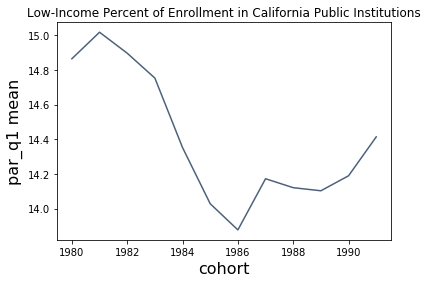

In [95]:
#plot `access` by cohort
#note: you will cover the group function later this week in Data 8. The code below collapses the data into cohort level averages.
ca_mobility_panel_public = ca_mobility_panel.where('type', are.equal_to('Public')).group('cohort', collect = np.mean)

#When plotting we must first select the columns we want to plot
ca_mobility_panel_public.select(make_array('cohort','par_q1 mean')).plot(column_for_xticks='cohort')
plt.title('Low-Income Percent of Enrollment in California Public Institutions')

** 3.3 ** Now, let's separate this figure by institution type.

To overlay plots, we had to go outside the datascience package. Here, I used matplotlib, what creates the Table.plot charts. If you're curious, you can learn more
[here](https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html?highlight=categorical).

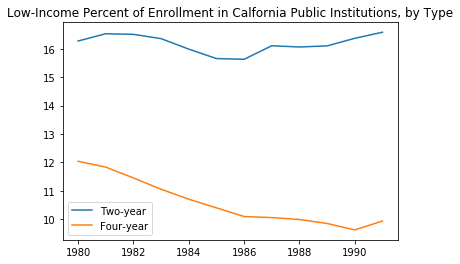

In [96]:
ca_mobility_two_year = ca_mobility_panel.where('type', are.equal_to('Public')
                                            ).where('iclevel', are.equal_to('Two-year')).group('cohort', collect = np.mean)

ca_mobility_four_year = ca_mobility_panel.where('type', are.equal_to('Public')
                                             ).where('iclevel', are.equal_to('Four-year')).group('cohort', collect = np.mean)

plt.plot(ca_mobility_two_year.column('cohort'), ca_mobility_two_year.column('par_q1 mean'), label = 'Two-year')
plt.plot(ca_mobility_four_year.column('cohort'), ca_mobility_four_year.column('par_q1 mean'), label = 'Four-year')
plt.title('Low-Income Percent of Enrollment in Calfornia Public Institutions, by Type')
plt.legend()

A couple of key takeaways from this figure:
* the *level* of `access` is significantly higher at two-year colleges.
* The decline in `access` over time is much steeper for 4-year colleges.

** 3.4 ** Finally, for comparison's sake, let’s check how low-income access is evolving at private 4-year institutions in California. 

Perhaps there is some substitution to these institutions, some of which have increased their financial aid offerings over time.

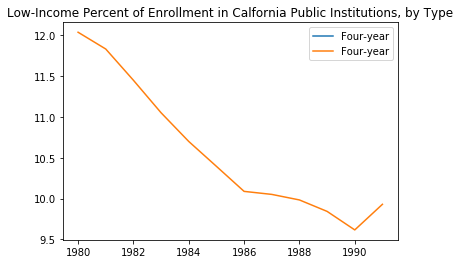

In [101]:
#use similar code as above, except replace public two-year institutions with private four-year institutions
print()
ca_mobility_two_year = ca_mobility_panel.where('type', are.equal_to('Private Non-Profit')
                                            ).where('iclevel', are.equal_to('Four-year')).group('cohort', collect = np.mean)

ca_mobility_four_year = ca_mobility_panel.where('type', are.equal_to('Public')
                                             ).where('iclevel', are.equal_to('Four-year')).group('cohort', collect = np.mean)

plt.plot(ca_mobility_two_year.column('cohort'), ca_mobility_two_year.column('par_q1 mean'), label = 'Four-year')
plt.plot(ca_mobility_four_year.column('cohort'), ca_mobility_four_year.column('par_q1 mean'), label = 'Four-year')
plt.title('Low-Income Percent of Enrollment in Calfornia Public Institutions, by Type')
plt.legend()

In fact, low-income access is also declining at private colleges and universities (note the change in veritcal axis scale).

If you're interested in these data, you can play around with [this data exploration tool](https://www.nytimes.com/interactive/projects/college-mobility/) put together by the New York Times.

To submit the lab, just run this cell below:

In [ ]:
####### ADD OK AUTH ##########

from client.api.notebook import Notebook
ok = Notebook('lab1.ok')
_ = ok.auth(inline=True)
_ = ok.submit()